In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pl
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [11]:
aerial=pd.read_csv('operations.csv')
weather_station_location=pd.read_csv('datasets_3759_5944_Weather Station Locations.csv')
weather=pd.read_csv('Summary of Weather.csv')

In [12]:
aerial.shape,weather_station_location.shape,weather.shape

((178281, 46), (161, 8), (119040, 31))

In [19]:
aerial.head()

,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Callsign,Mission Type,Takeoff Base,...,Incendiary Devices Weight (Tons),Fragmentation Devices,Fragmentation Devices Type,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID
0,1,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN
1,2,8/15/1943,PTO,USA,5 AF,400 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,9366.0
2,3,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN
3,4,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,7.5,NaN,NaN,NaN
4,5,8/15/1943,PTO,USA,5 AF,321 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,22585.0


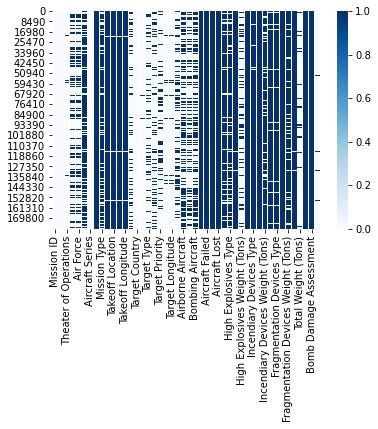

In [20]:
sns.heatmap(aerial.isnull(),cmap='Blues')

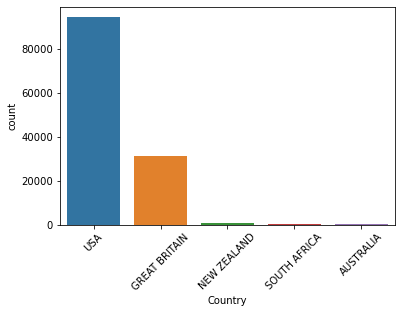

In [21]:
aerial=aerial[pd.isna(aerial.Country)==False]

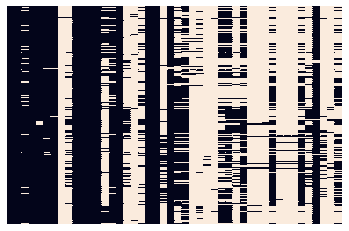

In [35]:
sns.heatmap(aerial.isnull(),xticklabels=0,yticklabels=0,cbar=False)

In [34]:
aerial=aerial[pd.isna(aerial['Target Longitude'])==False]
aerial=aerial[pd.isna(aerial['Takeoff Longitude'])==False]

In [36]:
drop_list = ['Mission ID','Unit ID','Target ID','Altitude (Hundreds of Feet)','Airborne Aircraft',
             'Attacking Aircraft', 'Bombing Aircraft', 'Aircraft Returned',
             'Aircraft Failed', 'Aircraft Damaged', 'Aircraft Lost',
             'High Explosives', 'High Explosives Type','Mission Type',
             'High Explosives Weight (Pounds)', 'High Explosives Weight (Tons)',
             'Incendiary Devices', 'Incendiary Devices Type',
             'Incendiary Devices Weight (Pounds)',
             'Incendiary Devices Weight (Tons)', 'Fragmentation Devices',
             'Fragmentation Devices Type', 'Fragmentation Devices Weight (Pounds)',
             'Fragmentation Devices Weight (Tons)', 'Total Weight (Pounds)',
             'Total Weight (Tons)', 'Time Over Target', 'Bomb Damage Assessment','Source ID']

In [37]:
aerial[drop_list]

,Mission ID,Unit ID,Target ID,Altitude (Hundreds of Feet),Airborne Aircraft,Attacking Aircraft,Bombing Aircraft,Aircraft Returned,Aircraft Failed,Aircraft Damaged,...,Incendiary Devices Weight (Tons),Fragmentation Devices,Fragmentation Devices Type,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID
0,1,27 FBG/86 FBG,40675,NaN,20.0,NaN,20.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10.00,NaN,NaN,NaN
2,3,27 FBG/86 FBG,9630,NaN,18.0,NaN,36.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9.00,NaN,NaN,NaN
3,4,27 FBG/86 FBG,16140,NaN,15.0,NaN,15.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.50,NaN,NaN,NaN
8,9,27 FBG/86 FBG,39469,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
9,10,27 FBG/86 FBG,16140,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178034,178496,27 FBG/86 FBG,32283,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
178035,178497,240 WG,NaN,NaN,16.0,14.0,14.0,NaN,NaN,NaN,...,17.01,NaN,NaN,NaN,0.0,NaN,50.76,NaN,NaN,699212.0
178080,178542,27 FBG/86 FBG,39469,NaN,85.0,NaN,85.0,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,42.50,NaN,NaN,NaN
178201,178663,205 GP,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,...,0.00,NaN,NaN,NaN,0.0,NaN,3.00,NaN,NaN,697989.0


In [40]:
aerial.drop(drop_list,axis=1,inplace=True)

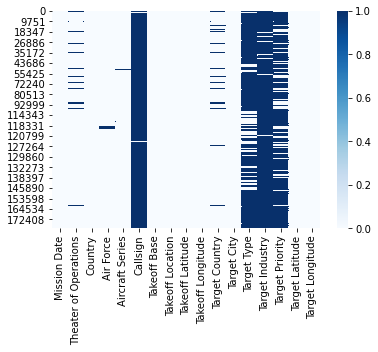

In [42]:
sns.heatmap(aerial.isnull(),cmap='Blues')

In [43]:
aerial.head()

,Mission Date,Theater of Operations,Country,Air Force,Aircraft Series,Callsign,Takeoff Base,Takeoff Location,Takeoff Latitude,Takeoff Longitude,Target Country,Target City,Target Type,Target Industry,Target Priority,Target Latitude,Target Longitude
0,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,SPADAFORA,NaN,NaN,NaN,38.22,15.37
2,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,COSENZA,NaN,NaN,NaN,39.27,16.25
3,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,GIOJA TAURO,NaN,NaN,NaN,38.43,15.90
8,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,SCILLA,NaN,NaN,NaN,38.23,15.72
9,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,GIOJA TAURO,NaN,ARMAMENT AND ORDNANCE PLANTS,NaN,38.43,15.90


In [56]:
aerial=aerial[aerial.iloc[:,8]!='4248']
aerial=aerial[aerial.iloc[:,9]!=1355]

In [57]:
aerial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2555 entries, 0 to 178080
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Mission Date           2555 non-null   object 
 1   Theater of Operations  2555 non-null   object 
 2   Country                2555 non-null   object 
 3   Air Force              2505 non-null   object 
 4   Aircraft Series        2528 non-null   object 
 5   Callsign               10 non-null     object 
 6   Takeoff Base           2555 non-null   object 
 7   Takeoff Location       2555 non-null   object 
 8   Takeoff Latitude       2555 non-null   object 
 9   Takeoff Longitude      2555 non-null   float64
 10  Target Country         2499 non-null   object 
 11  Target City            2552 non-null   object 
 12  Target Type            602 non-null    object 
 13  Target Industry        81 non-null     object 
 14  Target Priority        230 non-null    object 
 15  Ta

In [58]:
weather_station_location.head()

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333


In [59]:
weather_station_location=weather_station_location.loc[:,["WBAN","NAME","STATE/COUNTRY ID","Latitude","Longitude"]]
weather_station_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   WBAN              161 non-null    int64  
 1   NAME              161 non-null    object 
 2   STATE/COUNTRY ID  161 non-null    object 
 3   Latitude          161 non-null    float64
 4   Longitude         161 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 6.4+ KB


In [60]:
weather.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
weather=weather.loc[:,["STA","Date","MeanTemp"]]
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119040 non-null  int64  
 1   Date      119040 non-null  object 
 2   MeanTemp  119040 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ MB


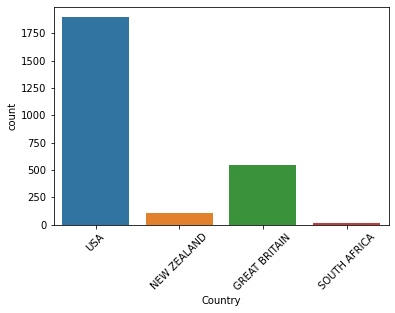

,index,Country
0,USA,1895
1,GREAT BRITAIN,544
2,NEW ZEALAND,102
3,SOUTH AFRICA,14


In [67]:
sns.countplot(aerial['Country'])
pl.xticks(rotation=45)
pl.show()
aerial['Country'].value_counts().reset_index()

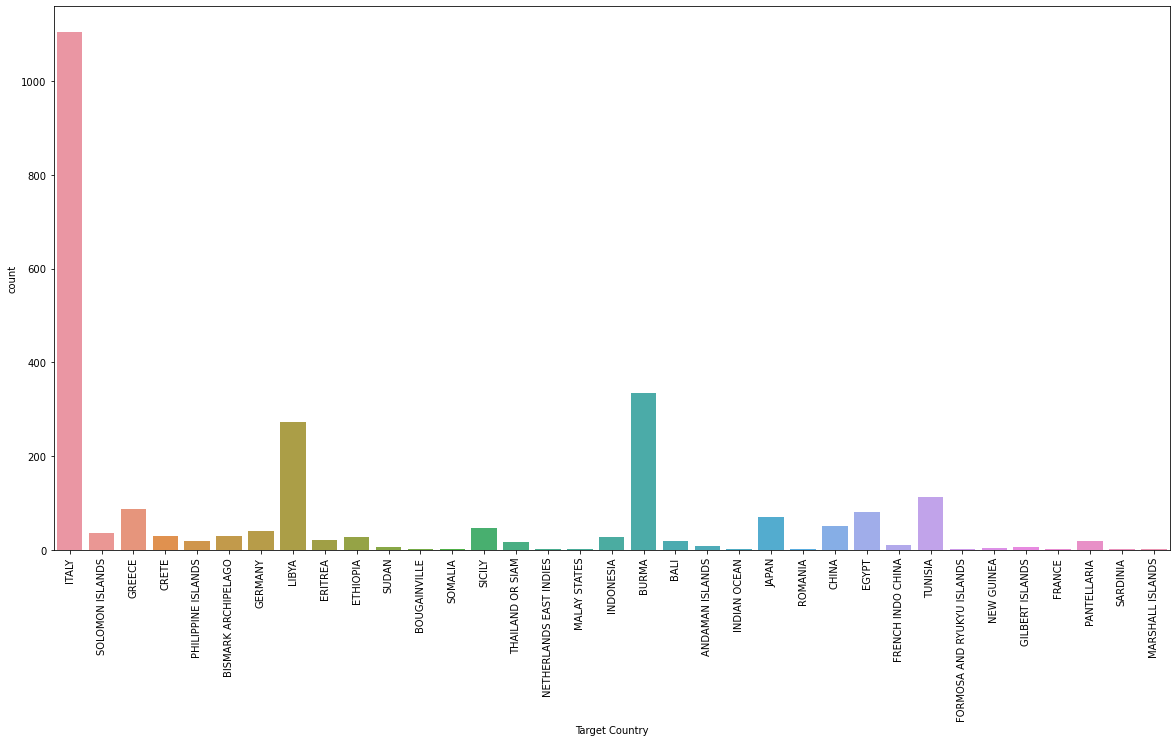

,index,Target Country
0,ITALY,1104
1,BURMA,335
2,LIBYA,272
3,TUNISIA,113
4,GREECE,87
5,EGYPT,80
6,JAPAN,71
7,CHINA,52
8,SICILY,46
9,GERMANY,41


In [79]:
pl.figure(figsize=(20,10))
sns.countplot(aerial['Target Country'])
pl.xticks(rotation=90)
pl.show()


aerial['Target Country'].value_counts()[:10].reset_index()

In [87]:
data=aerial['Aircraft Series'].value_counts()
data=[go.Bar(x=data[:10].index,
             y=data[:10].values,
            hoverinfo='text',
            marker=dict(color='rgba(177,14,22,0.5)',
            line=dict(color='rgb(0,0,0)',width=1.5)))]
layout=dict(title='Aircraft Series')
fig=go.Figure(data=data,layout=layout)
iplot(fig)

In [88]:
aerial.head()

,Mission Date,Theater of Operations,Country,Air Force,Aircraft Series,Callsign,Takeoff Base,Takeoff Location,Takeoff Latitude,Takeoff Longitude,Target Country,Target City,Target Type,Target Industry,Target Priority,Target Latitude,Target Longitude
0,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,SPADAFORA,NaN,NaN,NaN,38.22,15.37
2,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,COSENZA,NaN,NaN,NaN,39.27,16.25
3,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,GIOJA TAURO,NaN,NaN,NaN,38.43,15.90
8,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,SCILLA,NaN,NaN,NaN,38.23,15.72
9,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,GIOJA TAURO,NaN,ARMAMENT AND ORDNANCE PLANTS,NaN,38.43,15.90


In [99]:
aerial["color"]=''
aerial.color[aerial.Country=='USA']="rgb(0,116,217)"
aerial.color[aerial.Country == "GREAT BRITAIN"] = "rgb(255,65,54)"
aerial.color[aerial.Country == "NEW ZEALAND"] = "rgb(133,20,75)"
aerial.color[aerial.Country == "SOUTH AFRICA"] = "rgb(255,133,27)"


C:\Users\rissu\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\rissu\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\rissu\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\rissu\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A v

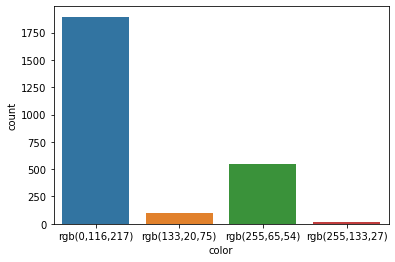

In [100]:
sns.countplot(aerial['color'])

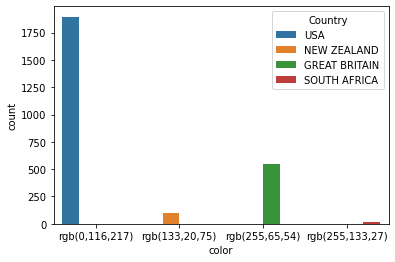

In [98]:
sns.countplot(data=aerial,x='color',hue='Country')

C:\Users\rissu\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



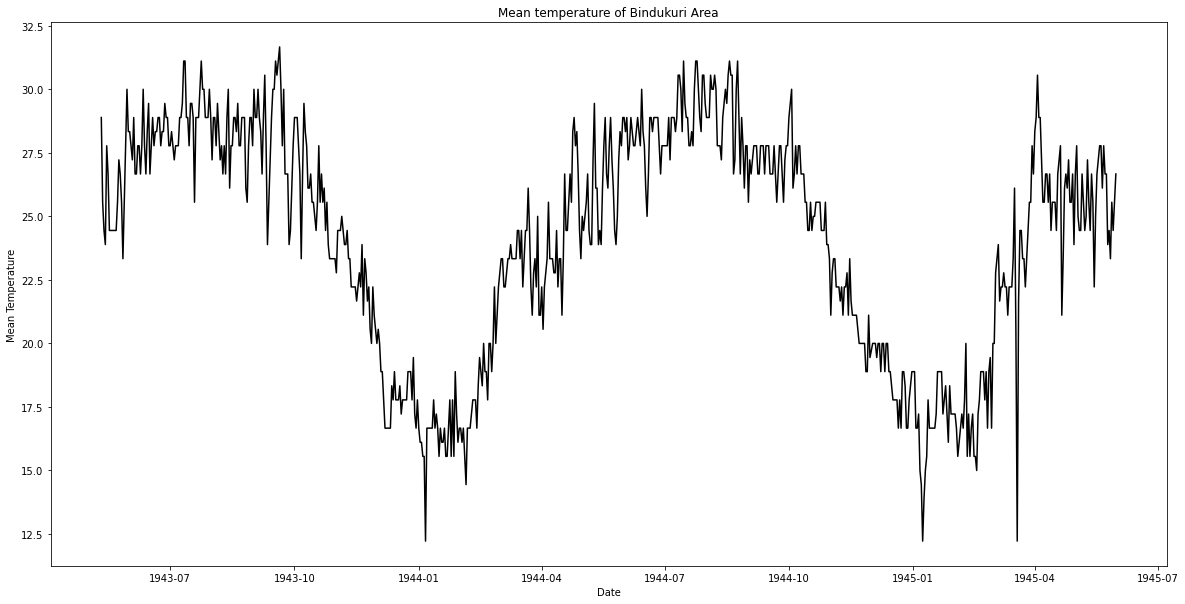

In [130]:
weather_station_id=weather_station_location[weather_station_location.NAME=='BINDUKURI'].WBAN
weather_bin=weather[weather.STA==32907]
weather_bin['Date']=pd.to_datetime(weather_bin['Date'])
pl.figure(figsize=(20,10))
pl.plot(weather_bin.Date,weather_bin.MeanTemp,color='black')
# pl.scatter(weather_bin.Date,weather_bin.MeanTemp,color='red')

pl.title("Mean temperature of Bindukuri Area")
pl.xlabel('Date')
pl.ylabel('Mean Temperature')
pl.show()



In [153]:
weather_bin

,STA,Date,MeanTemp
78252,32907,1943-05-11,28.888889
78253,32907,1943-05-12,25.555556
78254,32907,1943-05-13,24.444444
78255,32907,1943-05-14,23.888889
78256,32907,1943-05-15,27.777778
...,...,...,...
78998,32907,1945-05-27,23.333333
78999,32907,1945-05-28,25.555556
79000,32907,1945-05-29,24.444444
79001,32907,1945-05-30,25.555556


In [141]:
aerial=pd.read_csv('operations.csv')
aerial['year']=[each.split('/')[2] for each in aerial['Mission Date']]
aerial["month"] = [ each.split("/")[0] for each in aerial["Mission Date"]]
aerial=aerial[aerial['year']>='1943']
aerial=aerial[aerial['month']>='8']

aerial['Mission Date']=pd.to_datetime(aerial['Mission Date'])

attack='USA'
target='BURMA'
city='KATHA'

aerial_war=aerial[aerial.Country==attack]
aerial_war=aerial_war[aerial_war['Target Country']==target]
aerial_war=aerial_war[aerial_war['Target City']==city]

aerial_war.head()

C:\Users\rissu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning:

Columns (7,8,11,13,31,43,44) have mixed types.Specify dtype option on import or set low_memory=False.



,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Callsign,Mission Type,Takeoff Base,...,Fragmentation Devices Type,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID,year,month
3740,3741,1944-08-02,CBI,USA,10 AF,528 FS,P51,NaN,10,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,30767.0,1944,8
10023,10024,1943-09-20,CBI,USA,10 AF,490 BS,B25,NaN,1,NaN,...,NaN,NaN,NaN,NaN,10.0,NaN,NaN,30792.0,1943,9
10938,10939,1943-09-24,CBI,USA,10 AF,22 BS,B25,NaN,1,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,30765.0,1943,9
10942,10943,1943-09-24,CBI,USA,10 AF,22 BS,B25,NaN,1,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,30766.0,1943,9
20891,20892,1944-08-17,CBI,USA,10 AF,490 BS,B25,NaN,1,NaN,...,NaN,NaN,NaN,NaN,10.0,NaN,NaN,30809.0,1944,8


In [150]:
liste=[]
aa=[]
for each in aerial_war['Mission Date']:
    dummy=weather_bin[weather_bin.Date==each]
    liste.append(dummy['MeanTemp'].values)
aerial_war['dene']=liste
for each in aerial_war.dene.values:
    aa.append(each[0])


In [151]:
liste

[array([28.88888889]),
 array([31.66666667]),
 array([26.66666667]),
 array([26.66666667]),
 array([30.55555556]),
 array([31.11111111]),
 array([31.11111111]),
 array([31.11111111]),
 array([26.11111111]),
 array([27.77777778]),
 array([26.66666667]),
 array([27.77777778]),
 array([27.77777778]),
 array([26.66666667]),
 array([25.55555556]),
 array([27.22222222]),
 array([27.22222222]),
 array([27.22222222]),
 array([27.22222222])]

In [152]:
aa

[28.88888889,
 31.66666667,
 26.66666667,
 26.66666667,
 30.55555556,
 31.11111111,
 31.11111111,
 31.11111111,
 26.11111111,
 27.77777778,
 26.66666667,
 27.77777778,
 27.77777778,
 26.66666667,
 25.55555556,
 27.22222222,
 27.22222222,
 27.22222222,
 27.22222222]

In [163]:
trace=go.Scatter(x=weather_bin.Date,
                y=weather_bin.MeanTemp,
                mode='lines',marker=dict(color = 'rgba(16, 112, 2, 0.8)'),
                name='Mean Temperature')
trace1=go.Scatter(x=aerial_war['Mission Date'],y=aa,
                 mode='markers',
                 marker=dict(color='rgba(16, 0, 200, 1)'),
                 name='Bombing Temperature')

layout = dict(title = 'Mean Temperature --- Bombing Dates and Mean Temperature at this Date')
data = [trace,trace1]

fig = dict(data = data, layout = layout)
iplot(fig)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

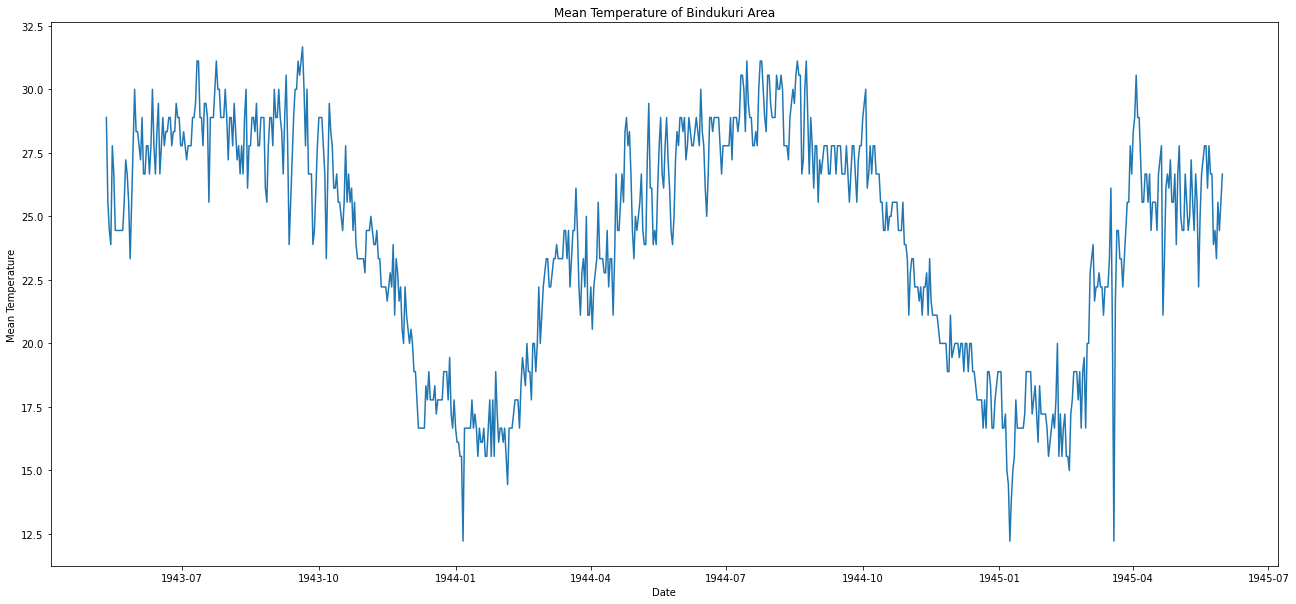

In [164]:
plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date,weather_bin.MeanTemp)
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()

In [165]:
weather_bin.shape

(751, 3)